In [1]:
# guess we should actually use Python 3...
from __future__ import print_function

In [2]:
import pymc3 as pm
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
if False:
    ??pm.Exponential

## A/B Testing

#### A only

Suppose:

* $H_0$: $p_A = 0.05$
* $H_A$: $p_A \ne 0.05$

In [4]:
p_true = 0.05
N = 150
occurrences = stats.bernoulli.rvs(p_true, size=N)

print('observed mean = ', np.mean(occurrences))
print('observed total = ', np.sum(occurrences))

observed mean =  0.0333333333333
observed total =  5


What is the 95% interval?

R approach, with normal approximation valid:

```
> (phat <- 75/150)
[1] 0.5
> (stderr <- sqrt(phat * (1 - phat) / 150))
[1] 0.04082483
> (CI95 <- phat + stderr * c(qnorm(0.025), qnorm(0.975)))
[1] 0.4199848 0.5800152
```

Here,

```
> (phat <- 4/150)
[1] 0.02666667
> (stderr <- sqrt(phat * (1 - phat) / 150))
[1] 0.01315435
> (CI95 <- phat + stderr * c(qnorm(0.025), qnorm(0.975)))
[1] 0.000884606 0.052448727
```

But, shouldn't bounding at zero be enforced? YES. Various conditions here are not met when `n_observed = 4`. The proper way to estimate the interval is with simulation.

The R way to solve that would be:

```
> x <- rbinom(n=10000, size=150, prob=0.05) / 150
> hist(x, breaks=10)
> sum(x <= phat)
[1] 1257
> sum(x <= phat) / 10000
[1] 0.1257
```

This provides a p-value (observation at least that extreme, coming from one side here), not an interval.

Here, need SciPy equivalent functions:

0.0498066666667


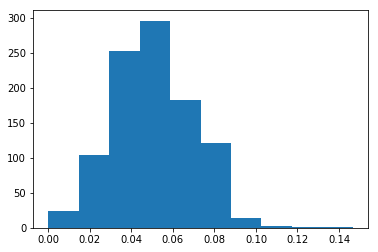

In [5]:
# `binom` takes arguments `n` and `p` - here 150 evts with p=0.05
B = stats.binom(150, 0.05)
# the `rvs` method takes the number of trials as an argument (or a shape parameter), then more
x = B.rvs(1000)
r = x / 150.
# plot
plt.hist(r)
rbar = np.mean(r)
print(rbar)

In [6]:
x[:10]

array([ 4,  5,  6,  7, 13,  7,  7, 10,  5, 12])

In [7]:
r[:11]

array([ 0.02666667,  0.03333333,  0.04      ,  0.04666667,  0.08666667,
        0.04666667,  0.04666667,  0.06666667,  0.03333333,  0.08      ,
        0.02666667])

In [8]:
np.sum(r <= rbar) / 1000.

0.53900000000000003

Get a 95% interval by finding the values around the mean that contain 95% of the entries?

In [9]:
v_1 = r > 0.03
v_2 = r < 0.07

In [10]:
np.std(r)

0.018207640642811957

In [11]:
type(r)

numpy.ndarray

In [12]:
r.shape

(1000,)

In [13]:
r.sort(axis=0)
print(r[:10])
print(r[-10:])

[ 0.          0.00666667  0.00666667  0.00666667  0.00666667  0.01333333
  0.01333333  0.01333333  0.01333333  0.01333333]
[ 0.09333333  0.09333333  0.1         0.1         0.1         0.10666667
  0.10666667  0.11333333  0.12666667  0.14666667]


In [14]:
print(r[24])
print(r[-25])

0.02
0.0866666666667


In [16]:
print(r[:24].shape)
print(r[-24:].shape)

(24,)
(24,)


In [17]:
?np.where